In [ ]:
# SETEO
archivo_csv_importar = 'noTengoInternet_utterances.csv' #nombre del archivo que contiene las oraciones
titulo_columna = 'FCD_COG_INPUT_TEXT' #nombre de la columna que contiene las oraciones

#Al trabajar con utterances cuya longitud (en caracteres) es menor a 50, los clusters son mejores
quedarseConUtterancesCortos = False 

# '' default (ej: pagó), 's' stemmization (ej: pag_), 'l' lemmatization (ej: pagar)
forma_tokenizar_clusters = '' 

#Definir que modelo usar, armar los vectores con tfidf es más rápido
modelo_preentrenado = True
tfidf = False

#Definir modelos para armar los clusters:
kmeans = False 
umaphdbscan = False

agglomerativeClustering = True
distance_threshold = 3 #se setea si se usa agglomerativeClustering

##### SOLO SI SE USA KMEANS:
#Si buscarCantidadDeClusters está en True hay que definir el rango en intervaloBusquedaClusters, sino, se define la cantidad de clusters a mano en cantidadDeClusters.
buscarCantidadDeClusters = True #se realiza la busqueda con silhouette score
intervaloBusquedaClusters = range(2,30)
cantidadDeClusters = 15

#Por si se quieren armar subclusters dentro de los clusters
armarSubClusters = False

# 2 (bigramas) o 3 (trigramas)
crear_unigramas = True
crear_bigramas = True
crear_trigramas = False
forma_tokenizar_bigramas = 's' # '' default (ej: pagó), 's' stemmization (ej: pag_), 'l' lemmatization (ej: pagar)

# lista de stopwords para agregar a las que ya existen en la librería
lista_stopwords_agregar = ["hola","Isa","a","eh","días","día","dia","dias","noche","noches","tardes","quiero","quería","queria","quisiera"
                   ,"necesito","necesitaría","necesitaria","yo","llamo","llame","llamé","llamaba","quisiera","ok","mirá","mira","aca","acá"
                   ,"decirte","favor","preguntar"]


#sinonimos que se usan si se vectoriza con TFIDF
sinonimos = {'agente': 'representante', 'persona': 'representante', 'operador': 'representante', 'asesor': 'representante'
             , 'empleado': 'representante', 'humano': 'representante', 'alguien': 'representante', 'atención': 'representante'
             , 'máquina': 'representante', 'gerente': 'representante', 'asistente': 'representante', 'sector': 'representante'
             , 'abonar': 'pagar', 'saldar': 'pagar', 'pago': 'pagar'
             , 'monto': 'saldo', 'deuda': 'saldo', 'mes': 'saldo', 'debo': 'saldo', 'importe': 'saldo', 'costo': 'saldo'
             , 'adeudo': 'saldo', 'cuánto': 'saldo'
             , 'telefono': 'linea', 'celular': 'linea', 'personal': 'linea', 'lineas': 'linea', 'telefinica': 'linea'
             , 'chip': 'linea', 'telecom': 'linea', 'sms': 'linea'
             , 'wi-fi': 'internet', 'whatsapp': 'internet', 'adsl': 'internet', 'router': 'internet', 'modem': 'internet'
             , 'fibertel': 'internet', 'gigas': 'internet', 'giga': 'internet', 'paquete': 'internet'
             , 'television': 'cable', 'televisor': 'cable', 'canales': 'cable', 'canal': 'cable', 'flow': 'cable'
             , 'disney': 'cable', 'hbo': 'cable', 'cablevision': 'cable'
             , 'boleta': 'factura', 'boletas': 'factura', 'bolita': 'factura', 'papeleta': 'factura', 'abono': 'factura'
             , 'plan': 'factura', 'facturas': 'factura', 'facturacion': 'factura'
             , 'consulta': 'consultar', 'conocer': 'consultar', 'saber': 'consultar', 'averiguar': 'consultar', 'ver': 'consultar'
             , 'preguntar': 'consultar', 'pregunta': 'consultar'
             , 'comunicar': 'hablar', 'pasar': 'hablar', 'atender': 'hablar', 'atienda': 'hablar', 'dame': 'hablar'
             , 'pásame': 'hablar', 'pasame': 'hablar'
             , 'quería': 'quiero', 'quisiera': 'quiero', 'necesito': 'quiero', 'necesitaría': 'quiero', 'gustaria': 'quiero'
             , 'error': 'problema', 'inconveniente': 'problema', 'suspendido': 'problema', 'restauracion': 'problema'
             , 'restaurar': 'problema', 'resolver': 'problema', 'recorte': 'problema', 'recuperar': 'problema', 'reclamo': 'problema'
             , 'vencido': 'vencida', 'vencimiento': 'vencida', 'vence': 'vencida'
             , 'habilitar': 'activar', 'activado': 'activar', 'habilitado': 'activar'
             , 'debaja': 'baja', 'debajo': 'baja', 'quitar': 'baja', 'eliminar': 'baja', 'borrar': 'baja', 'borrarme': 'baja'
             , 'descuento': 'promocion', 'rebaja': 'promocion', 'bonificacion': 'promocion', 'beneficio': 'promocion'
             , 'promo': 'promocion', 'barato': 'promocion'
             , 'bastante': 'aumento', 'caro': 'aumento', 'mas': 'aumento', 'tanto': 'aumento', 'interes': 'aumento'
             , 'mucho': 'aumento', 'aumento': 'aumento', 'incremento': 'aumento', 'incremento': 'aumento'
             , 'llego': 'aumento', 'cobrando': 'aumento', 'cobro': 'aumento', 'pagando': 'aumento', 'vino': 'aumento'
             , 'hola': 'saludo', 'tardes': 'saludo', 'dias': 'saludo', 'noches': 'saludo'
             , 'asunto': 'tema'}

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
from datetime import datetime, timedelta
# import random 
from random import sample
import os, ibm_db, ibm_db_dbi as dbi
import operator
from collections import Counter
import string
from gensim.models.phrases import Phrases, Phraser
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

import torch
from sklearn.cluster import AgglomerativeClustering




In [ ]:
!pip3 install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 58.4 MB/s eta 0:00:00


In [ ]:
pip install transformers==4.15.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 67.1 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.7/212.7 kB 66.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [51 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib
      creating build/lib/tokenizers
      copying py_src/tokenizers/__init__.py -> build/lib/tokenizers
      creating build/lib/tokenizers/models
      copying py_src/tokenizers/models/__init__.py -> build/lib/tokenizers/models
      creating build/lib/tokenizers/decoders
      copying py_src/tokenizers/decoders/__init__.py -> build/lib/tokenizers/decoders
      creating build/lib/tokenizers/normalizers
      copying 

In [ ]:
pip install -U sentence-transformers #instalar librería para vectorizar textos con modelos preentrenados

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=ad99c391ea405c7bb7bc839fac0e0818342c36f6a6bbb78020a76349e631ea76
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.5 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82827 sha256=496efa91df5b200c092507e461f9c1c9fda2cac17727478ede8d8e1039697a31
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55510 sha256=1a5cc5520bc921a524febdc924312597969b5d2ceba53bffec841fafb587b9a6
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/f8/5c/b4/a06301605095861524c1c7268a0d445b3a4c50292ce3bec24c
Successfully built umap-learn pynndescent
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 73.9 MB/s eta 0:00:00ta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp310-cp310-linux_x86_64.whl size=743098 sha256=e6f7b6cc3f2e562d6998950359e21314accad1cba0d177fcb7860d15bbcba562
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/dc/52/e3/6c6b60b126b4d5c4370cb5ac071b82950f91649d62d72f7f56
Successfully built hdbscan
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import umap
import hdbscan

In [ ]:
import random
from functools import partial

import tensorflow as tf
import tensorflow_hub as hub
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
from tqdm.notebook import trange
from hyperopt import fmin, tpe, hp, STATUS_OK, space_eval, Trials

pd.set_option("display.max_rows", 600)
pd.set_option("display.max_columns", 500)
pd.set_option("max_colwidth", 400)

In [ ]:
#pip install spacy-transformers

In [ ]:
from sentence_transformers import SentenceTransformer, util #se importan
model = SentenceTransformer('hiiamsid/sentence_similarity_spanish_es')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.46k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/701 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/123 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/770 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/439M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/299 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/480k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/556 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/242k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
import nltk

In [ ]:
!pip install spacy==3.1.0

#SÓLO CORRER ESTA CELDA LA PRIMERA VEZ (UNA VEZ QUE SE SUBIÓ EL "es_core_news_sm-3.1.0.tar.gz"). LUEGO NO HACE FALTA CORRER ESTA CELDA
with open("es_core_news_sm-3.1.0.tar.gz","wb") as f:
    f.write(projectEtl.get_file("es_core_news_sm-3.1.0.tar.gz").read())
!pip install es_core_news_sm-3.1.0.tar.gz



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached catalogue-2.0.8-py3-none-any.whl (17 kB)
  Using cached murmurhash-1.0.9-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (21 kB)
  Using cached pydantic-1.8.2-py3-none-any.whl (126 kB)
  Using cached thinc-8.0.17-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (659 kB)
  Using cached srsly-2.4.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (492 kB)
  Using cached preshed-3.0.8-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (124 kB)
  Using cached blis-0.7.9-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.2 MB)
  Using cached wasabi-0.10.1-py3-none-any.whl (26 kB)
  Using cached pa

  Created wheel for es-core-news-sm: filename=es_core_news_sm-3.1.0-py3-none-any.whl size=13675578 sha256=b18124f9be104718fe1c17bbc699ebc8a758a2a6aa2ad7fe0699d8194b74eb70
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/65/b6/6a/bd7967244382ec898b7341122332f61cdb9eca3faa1d050f08
Successfully built es-core-news-sm


In [ ]:
import spacy
from spacy.lang.es.stop_words import STOP_WORDS
nlp = spacy.load("es_core_news_sm", disable=['ner', 'parser', 'tagger'])

In [ ]:

# limpiar puntuaciones y stopwords
punctuation = string.punctuation + "«»“”‘’…—"
stopwords = pd.read_csv(
    'https://raw.githubusercontent.com/Alir3z4/stop-words/master/spanish.txt'
).values
stopwords = stopwords.flatten().tolist()
#lista_stopwords = ["hola","eh", "pago", "pagar","quiero","factura","linea","queria", 
#          "necesito","quisiera","numero","abono","boleta","dia","tarjeta","gracias","importe","mes","monto","deuda","a"]

stopwords.extend(lista_stopwords_agregar) #se agrega la lista de stopwords seteada anteriormente

#stopwords para remover de la lista
stopwords.remove("cuanto")
stopwords.remove("tanto")
stopwords.remove("poner")
stopwords.remove("mismo")
stopwords.remove("no")






In [ ]:
from nltk.stem import * #SnowballStemmer
stemmer = SnowballStemmer("spanish")

In [ ]:
def normalize(s): #Elimina tildes y puntuaciones
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
    )
    for a, b in replacements:
        s = s.replace(a, b).replace(a.upper(), b.upper())
    s = s.translate(str.maketrans('', '', punctuation)).lower()#.split() #se sacan los signos de puntuación
    return s

def simple_tokenizer(doc,stemm=False, lem=False): #elimina dígitos, elimina stopwords, utiliza stemming o lemmatizacion. Devuelve una lista de palabras
    tokenized_doc = ["" if t.isdigit() else t for t in doc.split()]  # se remueven los números
    tokenized_doc = [
        token.lower() for token in tokenized_doc if token.lower() not in stopwords and token != ""
    ] #se sacan las stopwords y ademas los tokens que quedan como "" ya que son números
    
    if stemm:
        tokenized_doc = [stemmer.stem(str(token)) for token in tokenized_doc] #sólo el stemming de los tokens
        
    if lem: #lemmatization
        tokenized_doc = " ".join(tokenized_doc)
        tokenized_doc = [x.lemma_ for x in nlp(tokenized_doc)]
        
    return tokenized_doc

def simple_tokenizer_cluster(doc,stemm=False, lem=False): #mismo que arriba pero devuelve oracion en vez de lista de palabras
    text_limpio = simple_tokenizer(doc,stemm, lem)
        
    text_limpio = " ".join(text_limpio)
        
    
    return text_limpio

def ngramas(df,gramas,nombre_columna_bigrama,nombre_columna_repeticion): #crea los bigramas o unigramas y el porcentaje que representan respecto al total
    df[f'{gramas}_gramas'] = df['tokens'].apply(lambda row: list(nltk.ngrams(row, gramas))) #se crean los ngramas para cada fila
    lista = [] #se crea una lista vacía para ir guardando los bigramas
    def desarmar(lista_):
        for conjuntos in set(lista_):
            lista.append(conjuntos)

    df[f'{gramas}_gramas'].apply(lambda x: desarmar(x)) #con lo siguiente se van pasando los bigramas a la función desarmar() y se guardan en una lista
    frequence = nltk.FreqDist(lista) #se calcula la frecuencia de aparición de los bigramas en la lista creada anteriormente
    sort = sorted(frequence.items(), key=operator.itemgetter(1), reverse=True) #se ordenan de mayor frecuencia a menor
    df[f'{gramas}_gramas_str'] = df[f'{gramas}_gramas'].apply(lambda x: [str(i) for i in x]) #se convierte la columna de gramas a string
    bigramas = pd.DataFrame([[str(i[0]), i[1]] for i in sort]) # la variable sort contiene el bigrama y la frecuencia de aparición, en esta línea se crea un df
    bigramas.rename(columns={0:nombre_columna_bigrama,1:"cantidad"},inplace=True)
    #que contiene el bigrama y su aparición
    df[nombre_columna_bigrama] = df[f'{gramas}_gramas_str'].apply(lambda x: next((i for i in bigramas[nombre_columna_bigrama].to_list() if i in x), None))
    #df["repeticion"] = df['bigrama'].apply(lambda x: bigramas[bigramas["bigrama"]==x]["cantidad"].iloc[0] if x != None else 0)
    repeticiones = df[nombre_columna_bigrama].value_counts()
    df[nombre_columna_repeticion] = df[nombre_columna_bigrama].map(repeticiones)
    #df["repeticion"].fillna(0)
    
    return sort

def buscarYDevolverIntencionInicialConfianza(context):  #cuanto se baja data de DB2, para extraer la confianza
    accion = re.findall("'confidence':0.[0-9]+", context)
    if len(accion)==1:
        return re.findall("0.[0-9]+", accion[0])[0]
    else: 
        accion = re.findall("'confidence':[0-9]+", context)
        if len(accion)==2:
            return re.findall("[0-9]+", accion[0])[0]
        else: return ""

def buscarYDevolverIntencionInicial(context): #cuanto se baja data de DB2, para extraer la intencion
    accion = re.findall("'intent':'(\w+)'", context)
    if len(accion)==1:
        return re.findall("(\w+)", accion[0])[0]
    else: return ""

In [ ]:
#Las siguientes funciones son de la libreria chatintents. Se utilizan para automatizar la búsqueda de hiperparámetros de umap y hdbscan

def generate_clusters(message_embeddings,
                      n_neighbors,
                      n_components, 
                      min_cluster_size,
                      random_state = None):
    """
    Generate HDBSCAN cluster object after reducing embedding dimensionality with UMAP
    """
    
    umap_embeddings = (umap.UMAP(n_neighbors=n_neighbors, 
                                n_components=n_components, 
                                metric='cosine', 
                                random_state=random_state)
                            .fit_transform(message_embeddings))

    clusters = hdbscan.HDBSCAN(min_cluster_size = min_cluster_size,
                               metric='euclidean', 
                               cluster_selection_method='eom').fit(umap_embeddings)

    return clusters

def score_clusters(clusters, prob_threshold = 0.05):
    """
    Returns the label count and cost of a given cluster supplied from running hdbscan
    """
    
    cluster_labels = clusters.labels_
    label_count = len(np.unique(cluster_labels))
    total_num = len(clusters.labels_)
    cost = (np.count_nonzero(clusters.probabilities_ < prob_threshold)/total_num)
    
    return label_count, cost

def objective(params, embeddings, label_lower, label_upper):
    """
    Objective function for hyperopt to minimize, which incorporates constraints
    on the number of clusters we want to identify
    """
    
    clusters = generate_clusters(embeddings, 
                                 n_neighbors = params['n_neighbors'], 
                                 n_components = params['n_components'], 
                                 min_cluster_size = params['min_cluster_size'],
                                 random_state = params['random_state'])
    
    label_count, cost = score_clusters(clusters, prob_threshold = 0.05)
    
    #15% penalty on the cost function if outside the desired range of groups
    if (label_count < label_lower) | (label_count > label_upper):
        penalty = 0.15 
    else:
        penalty = 0
    
    loss = cost + penalty
    
    return {'loss': loss, 'label_count': label_count, 'status': STATUS_OK}

def bayesian_search(embeddings, space, label_lower, label_upper, max_evals=100):
    """
    Perform bayseian search on hyperopt hyperparameter space to minimize objective function
    """
    
    trials = Trials()
    fmin_objective = partial(objective, embeddings=embeddings, label_lower=label_lower, label_upper=label_upper)
    best = fmin(fmin_objective, 
                space = space, 
                algo=tpe.suggest,
                max_evals=max_evals, 
                trials=trials)

    best_params = space_eval(space, best)
    print ('best:')
    print (best_params)
    print (f"label count: {trials.best_trial['result']['label_count']}")
    
    best_clusters = generate_clusters(embeddings, 
                                      n_neighbors = best_params['n_neighbors'], 
                                      n_components = best_params['n_components'], 
                                      min_cluster_size = best_params['min_cluster_size'],
                                      random_state = best_params['random_state'])
    
    return best_params, best_clusters, trials

def generate_clusters__(message_embeddings,
                      n_neighbors,
                      n_components, 
                      min_cluster_size,
                      random_state = None):
    """
    Generate HDBSCAN cluster object after reducing embedding dimensionality with UMAP
    """
    
    umap_embeddings = (umap.UMAP(n_neighbors=n_neighbors, 
                                n_components=n_components, 
                                metric='cosine', 
                                random_state=random_state)
                            .fit_transform(message_embeddings))

    clusters = hdbscan.HDBSCAN(min_cluster_size = min_cluster_size,
                               metric='euclidean', 
                               cluster_selection_method='eom').fit_predict(umap_embeddings)

    return clusters

#### Levantar CSV

In [ ]:
#se levanta el csv:
utterances = projectCCoC.get_file(archivo_csv_importar) 
utterances = pd.read_csv(utterances)

In [ ]:
utterances[titulo_columna] = utterances[titulo_columna].apply(lambda x: normalize(x)) #normalizo los textos

In [ ]:
#Se reemplazan palabras

utterances[titulo_columna] = utterances[titulo_columna].apply(lambda x: x.replace("eh",""))
utterances[titulo_columna] = utterances[titulo_columna].apply(lambda x: x.replace("importe","monto"))
utterances[titulo_columna] = utterances[titulo_columna].apply(lambda x: x.replace("precio","monto"))
utterances[titulo_columna] = utterances[titulo_columna].apply(lambda x: x.replace("costo","monto"))
utterances[titulo_columna] = utterances[titulo_columna].apply(lambda x: x.replace("boleta","factura"))
utterances[titulo_columna] = utterances[titulo_columna].apply(lambda x: x.replace("facturas","factura"))
utterances[titulo_columna] = utterances[titulo_columna].apply(lambda x: x.replace("cuenta","linea"))
utterances[titulo_columna] = utterances[titulo_columna].apply(lambda x: x.replace("numero","linea"))
utterances[titulo_columna] = utterances[titulo_columna].apply(lambda x: x.replace("queria","quiero"))
utterances[titulo_columna] = utterances[titulo_columna].apply(lambda x: x.replace("celular","telefono"))
utterances[titulo_columna] = utterances[titulo_columna].apply(lambda x: x.replace("equipo","telefono"))
utterances[titulo_columna] = utterances[titulo_columna].apply(lambda x: x.replace("asesor","representante"))
utterances[titulo_columna] = utterances[titulo_columna].apply(lambda x: x.replace("operador","representante"))
utterances[titulo_columna] = utterances[titulo_columna].apply(lambda x: x.replace("necesito","quiero"))
utterances[titulo_columna] = utterances[titulo_columna].apply(lambda x: x.replace("quisiera","quiero"))
utterances[titulo_columna] = utterances[titulo_columna].apply(lambda x: x.replace("consultar","saber"))
utterances[titulo_columna] = utterances[titulo_columna].apply(lambda x: x.replace("averiguar","saber"))
utterances[titulo_columna] = utterances[titulo_columna].apply(lambda x: x.replace("abonar","pagar"))

In [ ]:
utterances["longitud"] = utterances[titulo_columna].apply(lambda x: len(x)) #longitud de los textos

In [ ]:
if quedarseConUtterancesCortos:  
    utterances_largos=utterances[utterances["longitud"]>50].copy() #utterances cuya longitud es mayor a 50
    utterances=utterances[utterances["longitud"]<=50].copy() #utterances cuya longitud es menor a 50. Con estos se trabaja de acá en adelante.

In [ ]:
#se eliminan espacios en blanco que a veces quedan en las oraciones
def eliminarEspacioBlanco(texto):
    palabras = texto.split()
    texto_limpio = ' '.join(palabra.strip() for palabra in palabras)
    return texto_limpio
utterances[titulo_columna] = utterances[titulo_columna].apply(lambda x: eliminarEspacioBlanco(x))

In [ ]:
#se eliminan textos iguales (se deja uno solo)
utterances.drop_duplicates(subset=[titulo_columna],inplace=True)
utterances.reset_index(inplace=True)

In [ ]:
#Por si se quiere aplicar stemming o lemmatizacion a las oraciones
if forma_tokenizar_clusters == 's':
    utterances["tokens_cluster"] = utterances.apply(lambda x: simple_tokenizer_cluster(x[titulo_columna],stemm=True), axis = 1) #se tokenizan los textos, opcion stem
elif forma_tokenizar_clusters == 'l':
    utterances["tokens_cluster"] = utterances.apply(lambda x: simple_tokenizer_cluster(x[titulo_columna],lem=True), axis = 1) #se tokenizan los textos, opcion lem
else:
    utterances["tokens_cluster"] = utterances.apply(lambda x: simple_tokenizer_cluster(x[titulo_columna]), axis = 1) #se tokenizan los textos, normal

In [ ]:
utterances.columns

Index(['index', 'Unnamed: 0', 'FCD_COG_INPUT_TEXT', 'intencionInicial',
       'intencionInicialConfianza', 'longitud', 'tokens_cluster'],
      dtype='object')

In [ ]:
if "index" in utterances.columns:
    utterances.drop(columns=["index"],inplace=True)
if "Unnamed: 0" in utterances.columns:
    utterances.drop(columns=["Unnamed: 0"],inplace=True)
if 'level_0' in utterances.columns:
    utterances.drop(columns=['level_0'],inplace=True)

In [ ]:
utterances.columns

Index(['FCD_COG_INPUT_TEXT', 'intencionInicial', 'intencionInicialConfianza',
       'longitud', 'tokens_cluster'],
      dtype='object')

### Armar clusters

#### Vectorizar con sentence transformers:


In [ ]:
#Se vectorizan los textos con un modelo preentrenado de sentence transformers
if modelo_preentrenado:
    X = model.encode(utterances[titulo_columna].to_list()) 

#### Vectorizar con TF-IDF:

In [ ]:
def synonym_tokenizer(text):
    words = text.split()
    tokens = [sinonimos.get(word, word) for word in words]
    return tokens

In [ ]:
#se vectorizan los textos con TFIDF
if tfidf:

    vectorizer = TfidfVectorizer(sublinear_tf= True, min_df=10, norm='l2', ngram_range=(1, 2), encoding='utf-8'
                                 , decode_error='ignore', strip_accents='ascii', lowercase=True
                                 , tokenizer=synonym_tokenizer #función de sinónimos
                                 , stop_words=None) #stop_words='spanish')
    X = vectorizer.fit_transform(utterances["tokens_cluster"])

#### Continúa clusterización

In [ ]:
#Si se quiere realizar umap y luego hdbscan, se realiza la busqueda de hiperparametros
if umaphdbscan:
    hspace = {
            "n_neighbors": hp.choice('n_neighbors', range(3,16)),
            "n_components": hp.choice('n_components', range(100,101)), #dejar fijo este valor, es decir que la reducción de dimensionalidad sea de 99. Ver como modificarlo para que no pruebe
            "min_cluster_size": hp.choice('min_cluster_size', range(3,16)), #acá se setea dependiendo del tamaño del dataset, ya que determina el valor mínimo de datos que un cluster debe tener
            "random_state": 42
        }

    label_lower = 15
    label_upper = 25
    max_evals = 100

    best_params_use, best_clusters_use, trials_use = bayesian_search(X, 
                                                                     space=hspace, 
                                                                     label_lower=label_lower, 
                                                                     label_upper=label_upper, 
                                                                     max_evals=max_evals)
    
    clusters_ = generate_clusters__(X,n_neighbors=best_params_use["n_neighbors"],n_components=best_params_use["n_components"],min_cluster_size=best_params_use["min_cluster_size"],random_state=42)
    
    clusters_ = generate_clusters__(X,n_neighbors=best_params_use["n_neighbors"],n_components=best_params_use["n_components"],min_cluster_size=best_params_use["min_cluster_size"],random_state=42)

In [ ]:
distance_threshold = 4

In [ ]:
#clustering con agglomerativeClustering
if agglomerativeClustering:

    corpus_embeddings = model.encode(utterances[titulo_columna].to_list())
    # Normalize the embeddings to unit length
    corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)

    # Perform clustering
    clustering_model = AgglomerativeClustering(n_clusters=None, distance_threshold=distance_threshold) #, affinity='cosine', linkage='average', distance_threshold=0.4)
    clustering_model.fit(corpus_embeddings)
    cluster_assignment = clustering_model.labels_

    utterances["cluster"] = cluster_assignment

In [ ]:
len(utterances["cluster"].value_counts())

30

In [ ]:
utterances["cluster"].value_counts()

1     525
3     431
19    316
0     291
7     285
12    254
10    254
14    205
26    202
15    180
24    167
11    151
13    147
2     139
6     134
5     133
8     125
18    122
16    118
9     103
4      99
22     84
23     70
29     65
20     63
21     60
27     54
25     47
17     42
28     26
Name: cluster, dtype: int64

In [ ]:
from sentence_transformers import util

In [ ]:
utterances["outliers"] = 0
# calcular la similitud entre todas las oraciones del cluster
similarity_matrix = util.cos_sim(X, X)

# establecer umbral de similitud mínima
threshold = 0.60

# descartar oraciones con menor similitud
for i in range(len(utterances)):
    sim = similarity_matrix[i]
    sim[i] = 0  # eliminar similitud consigo mismo
    if max(sim) < threshold:
        utterances.at[i, "outliers"] = 1  # marcar oración como outlier

In [ ]:
utterances["similares"] = pd.Series(dtype='object')
# Establecer umbral de similitud
threshold = 0.9

# Buscar oraciones similares y agregar índices a la lista correspondiente
for i in range(len(utterances)):
    sim = similarity_matrix[i]
    sim[i] = 0  # Eliminar similitud consigo mismo
    idx_similares = list(np.where(sim > threshold)[0])
    utterances.at[i, "similares"] = idx_similares

In [ ]:
utterances["similares"] = utterances.similares.apply(lambda x: str(x))

In [ ]:
utterances.outliers.value_counts()

0    4677
1     685
Name: outliers, dtype: int64

In [ ]:
utterances[utterances["cluster"]==1]

,FCD_COG_INPUT_TEXT,intencionInicial,intencionInicialConfianza,longitud,tokens_cluster,cluster,outliers
4,mi hija tiene que rendir en media hora y no tenemos internet ya reclame y no hay caso,noTengoInternet,0.958463,85,hija rendir media hora no internet reclame no caso,1,1
19,se me corta va y vuelve el wifi,noTengoInternet,0.875508,31,corta vuelve wifi,1,0
35,si yo quiero en rivadavia xxxx ayacucho desde ayer que estoy sin servicio de internet ya hice todo lo que me lo recomienda nada no tengo el ni una señal,noTengoInternet,0.999032,152,rivadavia xxxx ayacucho servicio internet hice recomienda no señal,1,0
69,o me estan dando muy lenta internet quiero saber cual es el motivo,noTengoInternet,0.974660,66,dando lenta internet motivo,1,0
74,no puedo ingresar a varias paginas en internet,noTengoInternet,0.871892,46,no ingresar paginas internet,1,0
88,me conectaron hace xx dias internet y no tengo y de ayer que estoy reclamando y no pasa nada quiero saber como puedo arreglar esto,noTengoInternet,0.997583,130,conectaron xx internet no reclamando no pasa arreglar,1,0
92,se me corta el servicio de internet todos los dias,noTengoInternet,0.991784,50,corta servicio internet,1,0
106,me podrias chequear el como esta la red wifi mia porque tengo muy baja señal y a veces no tengo wifi,noTengoInternet,0.998157,100,chequear red wifi mia baja señal no wifi,1,0
111,si hablo desenchufe lo vino el encargado recien me dio una mano pero dice que no entra la señal aca en mi telefono ni en alexa que tengo esa musica en esta todo aprendido a las luces pero no entra la señal,noTengoInternet,0.735608,205,hablo desenchufe vino encargado recien mano no entra señal telefono alexa musica aprendido luces no entra señal,1,0
138,si este que tal soy este liliana balbiani y no tengo internet ya desenchufe por xx segundos y no volvi a internet hace dos dias que no tengo internet,noTengoInternet,0.999782,149,liliana balbiani no internet desenchufe xx segundos no volvi internet no internet,1,0


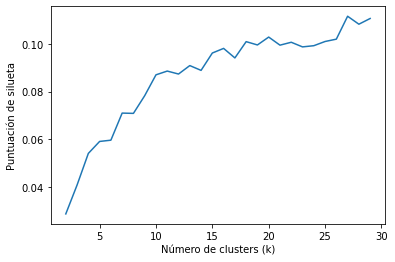

El mejor valor de k es: 27


In [ ]:
#si se utiliza kmeans, para poder definir un numero de cluster se utiliza silhouette score
if kmeans:
    if buscarCantidadDeClusters:  
        from sklearn.metrics import silhouette_score
        import matplotlib.pyplot as plt

        # Definimos una lista de valores de k que queremos evaluar
        k_values = intervaloBusquedaClusters #range(desde,hasta)

        # Calculamos la puntuación de silueta para cada valor de k
        silhouette_scores = []
        for k in k_values:
            kmeans = KMeans(n_clusters=k)
            labels = kmeans.fit_predict(X)
            score = silhouette_score(X, labels)
            silhouette_scores.append(score)

        # Graficamos la puntuación de silueta en función de k
        plt.plot(k_values, silhouette_scores)
        plt.xlabel('Número de clusters (k)')
        plt.ylabel('Puntuación de silueta')
        plt.show()

        # Seleccionamos el valor de k que maximiza la puntuación de silueta
        best_k = k_values[np.argmax(silhouette_scores)]
        print('El mejor valor de k es:', best_k)

In [ ]:
#SE ARMAN LOS CLUSTERS con kmeans
if kmeans: 
    if not buscarCantidadDeClusters:
        best_k = cantidadDeClusters


    # initialize kmeans
    kmeans = KMeans(n_clusters=best_k, random_state=42)
    # fit the model
    kmeans.fit(X)
    # store cluster labels in a variable
    clusters = kmeans.labels_

    # initialize PCA with 2 components
    # pca = PCA(n_components=2, random_state=42)
    # # pass our X to the pca and store the reduced vectors into pca_vecs
    # pca_vecs = pca.fit_transform(X) #X.toarray() PARA TFID
    # # save our two dimensions into x0 and x1
    # x0 = pca_vecs[:, 0]
    # x1 = pca_vecs[:, 1]

    # assign clusters and pca vectors to our dataframe 
    utterances['cluster'] = clusters

In [ ]:
#subclusters
#cantidad de subcluster por cluster:
if armarSubClusters:
    cantidad_sub = 3
    for cluster in range(best_k):
        cluster_df = utterances[utterances['cluster'] == cluster]
        embeddings = vectorizer.fit_transform(cluster_df["tokens_cluster"])
        kmeans_subclusters = KMeans(n_clusters=cantidad_sub, random_state=42)
        kmeans_subclusters.fit(embeddings)
        subclusters = kmeans_subclusters.labels_
        utterances.loc[utterances['cluster'] == cluster, 'subcluster'] = subclusters

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


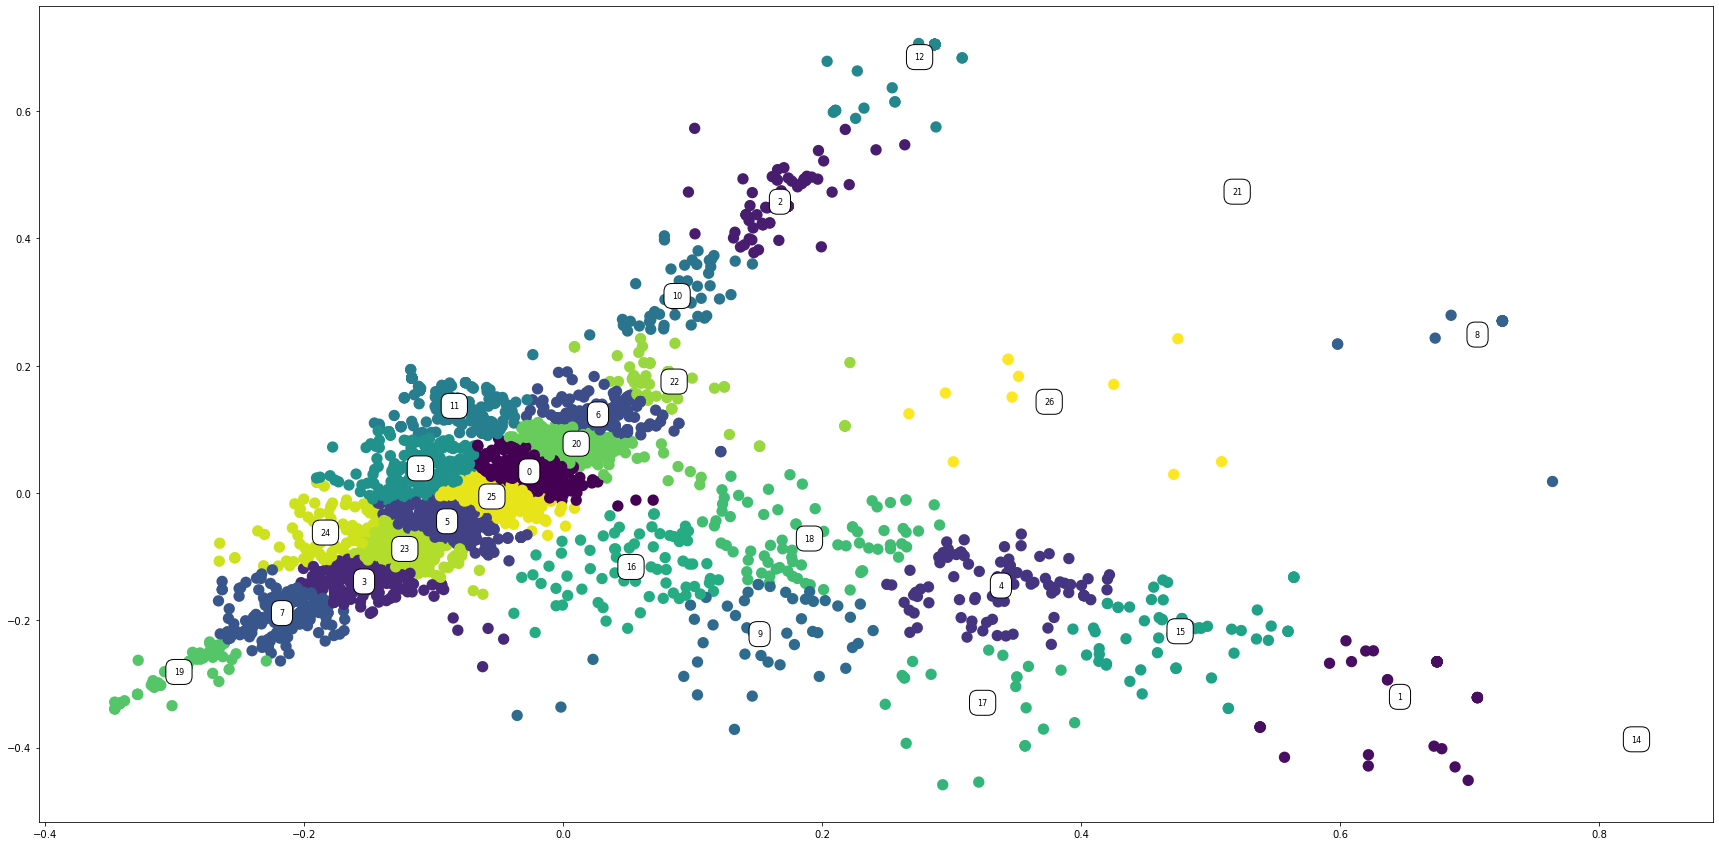

In [ ]:
if kmeans:   
    sklearn_pca = PCA(n_components = 2)
    Y_sklearn = sklearn_pca.fit_transform(X.toarray())
    kmeans = KMeans(n_clusters=best_k, max_iter=600, algorithm = 'auto')
    fitted = kmeans.fit(Y_sklearn)
    prediction = kmeans.predict(Y_sklearn)
    plt.figure(figsize=(30, 15))
    plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=40, cmap='viridis', linewidths=5)
    centers = fitted.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1],c='black', s=200, alpha=0.6)
    for i, center in enumerate(centers):
        plt.text(center[0], center[1], f"{i}", fontsize=8, ha='center', va='center', bbox=dict(fc='w', boxstyle='round,pad=1'))

In [ ]:
#silhouette score pro cluster

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

cluster_silhouette_avgs = {}
# Calcular la puntuación de silueta para cada punto de datos
silhouette_vals = silhouette_samples(X, clusters)
for i in range(best_k):
    # Obtener la puntuación de silueta media para el cluster i-ésimo
    cluster_silhouette_vals = silhouette_vals[clusters == i]
    cluster_silhouette_avg = np.mean(cluster_silhouette_vals)
    # Agregar la puntuación de silueta media al diccionario con la clave del número de cluster
    cluster_silhouette_avgs[i] = cluster_silhouette_avg

# Ordenar el diccionario por valor en orden descendente y mostrar los resultados
sorted_cluster_silhouette_avgs = sorted(cluster_silhouette_avgs.items(), key=lambda x: x[1], reverse=True)
for cluster, silhouette_avg in sorted_cluster_silhouette_avgs:
    print("La puntuación de silueta media para el cluster", cluster, "es:", silhouette_avg)
    
#1 significa que los puntos están muy cerca de su propio cluster y lejos de otros clusteres, mientras que -1 indica que los puntos están cerca de los clusteres vecinos.
#0 indica que en ese cluster hay puntos que pueden pertenecer a otros clusters

La puntuación de silueta media para el cluster 24 es: 0.3418739066870186
La puntuación de silueta media para el cluster 14 es: 0.3259581759896479
La puntuación de silueta media para el cluster 7 es: 0.2916336634820649
La puntuación de silueta media para el cluster 11 es: 0.291090933472243
La puntuación de silueta media para el cluster 23 es: 0.23582011766902855
La puntuación de silueta media para el cluster 5 es: 0.2127131739077929
La puntuación de silueta media para el cluster 10 es: 0.18446582554863805
La puntuación de silueta media para el cluster 26 es: 0.1754167884029653
La puntuación de silueta media para el cluster 9 es: 0.16963007802627922
La puntuación de silueta media para el cluster 20 es: 0.16876254358525622
La puntuación de silueta media para el cluster 1 es: 0.1479646926931819
La puntuación de silueta media para el cluster 17 es: 0.14292315725984495
La puntuación de silueta media para el cluster 16 es: 0.13614451184428453
La puntuación de silueta media para el cluster 3 e

### Bigramas/unigramas por clusters

In [ ]:
#Se tokenizan las oraciones
if forma_tokenizar_bigramas == 's':
    utterances["tokens"] = utterances.apply(lambda x: simple_tokenizer(x[titulo_columna],stemm=True), axis = 1) #se tokenizan los textos, opcion stem
elif forma_tokenizar_bigramas == 'l':
    utterances["tokens"] = utterances.apply(lambda x: simple_tokenizer(x[titulo_columna],lem=True), axis = 1) #se tokenizan los textos, opcion lem
else:
    utterances["tokens"] = utterances.apply(lambda x: simple_tokenizer(x[titulo_columna]), axis = 1) #se tokenizan los textos, normal

In [ ]:
utterances.columns

Index(['FCD_COG_INPUT_TEXT', 'intencionInicial', 'intencionInicialConfianza',
       'tokens_cluster', 'cluster', 'outliers', 'tokens'],
      dtype='object')

In [ ]:
titulo_columna_cluster = "cluster"
utterances.reset_index(inplace=True)

In [ ]:
utterances.columns

Index(['index', 'FCD_COG_INPUT_TEXT', 'intencionInicial',
       'intencionInicialConfianza', 'tokens_cluster', 'cluster', 'outliers',
       'tokens'],
      dtype='object')

In [ ]:
if "index" in utterances.columns:
    utterances.drop(columns=["index"],inplace=True)
if "Unnamed: 0" in utterances.columns:
    utterances.drop(columns=["Unnamed: 0"],inplace=True)
if 'level_0' in utterances.columns:
    utterances.drop(columns=['level_0'],inplace=True)

In [ ]:
# si se hacen los unigramas por cluster o no
if crear_unigramas:
    n_gramas = 1
    if titulo_columna_cluster == '':
        a = ngramas(utterances, n_gramas,"unigramaCluster")
    else:
        df_final = pd.DataFrame()
        utterances = utterances.groupby(titulo_columna_cluster)
        for i in utterances[titulo_columna_cluster].value_counts().index:
            df_cluster = utterances.get_group(i[0])
            a = ngramas(df_cluster, n_gramas,"unigramaCluster","repeticionUnigramasClusters")
            df_final = pd.concat([df_final, df_cluster], ignore_index=True)
        df_final = df_final.reset_index()
        utterances = df_final.copy()

In [ ]:
conteo_cluster=pd.DataFrame(utterances["cluster"].value_counts()).reset_index()
utterances["porcentajeUnigramaRespectoCluster"] = utterances.apply(lambda x: (x["repeticionUnigramasClusters"] / conteo_cluster[conteo_cluster["index"]==x["cluster"]]["cluster"].iloc[0])*100,axis=1)

In [ ]:
# si se hacen los bigramas por cluster o no
if crear_bigramas:
    n_gramas = 2
    if titulo_columna_cluster == '':
        a = ngramas(utterances, n_gramas,"bigramasClusters")
    else:
        df_final = pd.DataFrame()
        utterances = utterances.groupby(titulo_columna_cluster)
        for i in utterances[titulo_columna_cluster].value_counts().index:
            df_cluster = utterances.get_group(i[0])
            a = ngramas(df_cluster, n_gramas,"bigramasClusters","repeticionBigramasClusters")
            df_final = pd.concat([df_final, df_cluster], ignore_index=True)
        df_final = df_final.reset_index()
        utterances = df_final.copy()

In [ ]:
conteo_cluster=pd.DataFrame(utterances["cluster"].value_counts()).reset_index()
utterances["porcentajeBigramaRespectoCluster"] = utterances.apply(lambda x: (x["repeticionBigramasClusters"] / conteo_cluster[conteo_cluster["index"]==x["cluster"]]["cluster"].iloc[0])*100,axis=1)

In [ ]:
utterances.drop(columns=["index"],inplace=True)

In [ ]:
# si se hacen los trigramas por cluster o no
if crear_trigramas:
    n_gramas = 3
    if titulo_columna_cluster == '':
        a = ngramas(utterances, n_gramas,"trigramasClusters")
    else:
        df_final = pd.DataFrame()
        utterances = utterances.groupby(titulo_columna_cluster)
        for i in utterances[titulo_columna_cluster].value_counts().index:
            df_cluster = utterances.get_group(i[0])
            a = ngramas(df_cluster, n_gramas,"trigramasClusters","repeticionTrigramasClusters")
            df_final = pd.concat([df_final, df_cluster], ignore_index=True)
        df_final = df_final.reset_index()
        utterances = df_final.copy()

In [ ]:
# si se hacen los bigramas por subcluster o no
if armarSubClusters:
    if titulo_columna_cluster == '':
        a = ngramas(utterances, n_gramas,"bigramasSubClusters")
    else:
        df_final = pd.DataFrame()
        utterances = utterances.groupby([titulo_columna_cluster,titulo_columna_subcluster])
        for i in utterances.groups.keys():
            df_cluster = utterances.get_group(i)
            a = ngramas(df_cluster, n_gramas,"bigramasSubClusters","repeticionBigramasSubClusters")
            df_final = pd.concat([df_final, df_cluster], ignore_index=True)
        df_final = df_final.reset_index()
        utterances = df_final.copy()
    conteo_subcluster=pd.DataFrame(utterances[["clusters","subclusters"]].value_counts()).reset_index()
    utterances["porcentajeBigramaRespectoSubCluster"] = utterances.apply(lambda x: (x["repeticionBigramasSubClusters"] / conteo_subcluster[(conteo_subcluster["cluster id"]==x["cluster id"]) & (conteo_subcluster["sub-cluster id"]==x["sub-cluster id"])][0].iloc[0])*100,axis=1)

In [ ]:
tabla_bigramas_clusters=utterances[["cluster","bigramasClusters","repeticionBigramasClusters","porcentajeBigramaRespectoCluster"]].drop_duplicates().sort_values(["cluster","porcentajeBigramaRespectoCluster"],ascending=False)
tabla_unigramas_clusters=utterances[["cluster","unigramaCluster","repeticionUnigramasClusters","porcentajeUnigramaRespectoCluster"]].drop_duplicates().sort_values(["cluster","porcentajeUnigramaRespectoCluster"],ascending=[False,False])

In [ ]:
tabla_unigramas=tabla_unigramas_clusters.groupby(["cluster"]).agg({'porcentajeUnigramaRespectoCluster':'max',"unigramaCluster":"first"})[["unigramaCluster","porcentajeUnigramaRespectoCluster"]].reset_index()

In [ ]:
tabla_unigramas.groupby(["unigramaCluster"])["cluster"].unique() #cluster en los que se repiten los unigramas

unigramaCluster
('conexion',)                                                                                                                                                                 [34]
('domicili',)                                                                                                                                                                 [41]
('internet',)     [0, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 26, 27, 29, 30, 32, 33, 35, 36, 37, 39, 40, 42, 43, 45, 47, 49, 50, 52, 53, 54, 56]
('modem',)                                                                                                                                                                [25, 44]
('mudanz',)                                                                                                                                                                   [57]
('no',)                                                                                  

In [ ]:
tabla_unigramas #en qué porcentaje de utterances existe el unigrama por cluster

,cluster,unigramaCluster,porcentajeUnigramaRespectoCluster
0,0,"('internet',)",99.401198
1,1,"('wifi',)",100.000000
2,2,"('internet',)",77.707006
3,3,"('internet',)",94.482759
4,4,"('wifi',)",96.470588
5,5,"('internet',)",94.791667
6,6,"('internet',)",100.000000
7,7,"('internet',)",90.243902
8,8,"('internet',)",89.344262
9,9,"('internet',)",100.000000


In [ ]:
#en qué porcentaje de utterances existe el bigrama
tabla_bigramas=tabla_bigramas_clusters.groupby(["cluster"]).agg({'porcentajeBigramaRespectoCluster':'max',"bigramasClusters":"first"})[["bigramasClusters","porcentajeBigramaRespectoCluster"]].reset_index()

In [ ]:
tabla_bigramas

,cluster,bigramasClusters,porcentajeBigramaRespectoCluster
0,0,"('servici', 'internet')",7.784431
1,1,"('problem', 'wifi')",25.000000
2,2,"('no', 'internet')",31.210191
3,3,"('no', 'internet')",20.000000
4,4,"('no', 'wifi')",32.352941
5,5,"('no', 'internet')",56.250000
6,6,"('anda', 'internet')",9.195402
7,7,"('no', 'internet')",30.081301
8,8,"('no', 'internet')",31.967213
9,9,"('no', 'internet')",54.430380


In [ ]:
utterances.sort_values(["cluster","repeticionUnigramasClusters"],ascending=[False, False],inplace=True)

In [ ]:
utterances.columns

Index(['level_0', 'FCD_COG_INPUT_TEXT', 'intencionInicial',
       'intencionInicialConfianza', 'longitud', 'tokens_cluster', 'cluster',
       'tokens', '1_gramas', '1_gramas_str', 'unigramaCluster',
       'repeticionUnigramasClusters', 'porcentajeUnigramaRespectoCluster',
       '2_gramas', '2_gramas_str', 'bigramasClusters',
       'repeticionBigramasClusters', 'porcentajeBigramaRespectoCluster'],
      dtype='object')

In [ ]:
exportar=utterances[["FCD_COG_INPUT_TEXT",
       'intencionInicial', 'intencionInicialConfianza',
       'cluster', 'unigramaCluster',
       'repeticionUnigramasClusters', 'porcentajeUnigramaRespectoCluster',
       'bigramasClusters','repeticionBigramasClusters', 'porcentajeBigramaRespectoCluster']]

In [ ]:
exportar

,FCD_COG_INPUT_TEXT,intencionInicial,intencionInicialConfianza,cluster,unigramaCluster,repeticionUnigramasClusters,porcentajeUnigramaRespectoCluster,bigramasClusters,repeticionBigramasClusters,porcentajeBigramaRespectoCluster
3807,quiero o sea quemar el pago que hice de la linea y no me la habilita,pagueSuspendida,0.692543,26,"('habilit',)",48,100.0,"('no', 'habilit')",45,93.750000
3808,porque tengo otro telefono y pague la linea y no me lo habilita,pagueSuspendida,0.993600,26,"('habilit',)",48,100.0,"('no', 'habilit')",45,93.750000
3809,yo habia comprado pago internet hoy temprano y todavia no me habilita quiero saber que paso,pagueSuspendida,0.922985,26,"('habilit',)",48,100.0,"('no', 'habilit')",45,93.750000
3810,quiero que me habiliten el pack les diga que me tienen que habilitar y no me lo habilita,pagueSuspendida,0.755770,26,"('habilit',)",48,100.0,"('no', 'habilit')",45,93.750000
3811,ya hice el pago de la linea y no se me habilita,pagueSuspendida,0.931610,26,"('habilit',)",48,100.0,"('no', 'habilit')",45,93.750000
...,...,...,...,...,...,...,...,...,...,...
94,estoy pagando mucho mucho abono y y no me esta resultando no anda bien la linea,pagueSuspendida,0.831041,0,"('no',)",99,100.0,"('abon', 'no')",70,70.707071
95,no pague el abono y no tengo internet,pagueSuspendida,0.939970,0,"('no',)",99,100.0,"('abon', 'no')",70,70.707071
96,ayudame en el tema de que no tengo internet no puedo navegar no tengo nada y yo ya pague la factura hoy pague la factura pero no tengo nada que paso lisa,pagueSuspendida,0.890668,0,"('no',)",99,100.0,"('factur', 'no')",29,29.292929
97,si este era para para informar en la linea de que ya pague el abono y no me han habilitado,pagueSuspendida,0.931650,0,"('no',)",99,100.0,"('abon', 'no')",70,70.707071


In [ ]:
utterances.cluster.unique()

array([27,  6, 25,  7, 11,  8, 18, 33, 10, 24, 16, 22,  5, 13,  0,  4, 30,
        2, 19, 14, 26, 20, 37,  9, 32, 23, 15, 28, 34, 17, 36, 39,  3, 35,
       29,  1, 12, 38, 31, 21])

In [ ]:
from sentence_transformers import util

In [ ]:
utterances[utterances["cluster"]==8]

,FCD_COG_INPUT_TEXT,intencionInicial,intencionInicialConfianza,tokens_cluster,cluster,outliers,tokens,1_gramas,1_gramas_str,unigramaCluster,repeticionUnigramasClusters,porcentajeUnigramaRespectoCluster,2_gramas,2_gramas_str,bigramasClusters,repeticionBigramasClusters,porcentajeBigramaRespectoCluster
1029,se corto el televisor estoy sin señal tengo internet tengo todo pero el televisor esta como servicio apagado,noTengoInternet,0.999935,corto televisor señal internet televisor servicio apagado,8,0,"[cort, televisor, señal, internet, televisor, servici, apag]","[(cort,), (televisor,), (señal,), (internet,), (televisor,), (servici,), (apag,)]","[('cort',), ('televisor',), ('señal',), ('internet',), ('televisor',), ('servici',), ('apag',)]","('internet',)",109,89.344262,"[(cort, televisor), (televisor, señal), (señal, internet), (internet, televisor), (televisor, servici), (servici, apag)]","[('cort', 'televisor'), ('televisor', 'señal'), ('señal', 'internet'), ('internet', 'televisor'), ('televisor', 'servici'), ('servici', 'apag')]","('internet', 'televisor')",9.0,7.377049
1030,no tengo nada carne de internet ningun canal de futbol,noTengoInternet,0.976919,no carne internet ningun canal futbol,8,0,"[no, carn, internet, ningun, canal, futbol]","[(no,), (carn,), (internet,), (ningun,), (canal,), (futbol,)]","[('no',), ('carn',), ('internet',), ('ningun',), ('canal',), ('futbol',)]","('internet',)",109,89.344262,"[(no, carn), (carn, internet), (internet, ningun), (ningun, canal), (canal, futbol)]","[('no', 'carn'), ('carn', 'internet'), ('internet', 'ningun'), ('ningun', 'canal'), ('canal', 'futbol')]","('internet', 'ningun')",1.0,0.819672
1031,no me funciona la television con internet,noTengoInternet,0.727667,no funciona television internet,8,0,"[no, funcion, television, internet]","[(no,), (funcion,), (television,), (internet,)]","[('no',), ('funcion',), ('television',), ('internet',)]","('internet',)",109,89.344262,"[(no, funcion), (funcion, television), (television, internet)]","[('no', 'funcion'), ('funcion', 'television'), ('television', 'internet')]","('television', 'internet')",9.0,7.377049
1032,tengo muy mala señal de internet y hace mucho ruido el tema de la television se pixelea,noTengoInternet,0.994055,mala señal internet ruido tema television pixelea,8,0,"[mal, señal, internet, ruid, tem, television, pixele]","[(mal,), (señal,), (internet,), (ruid,), (tem,), (television,), (pixele,)]","[('mal',), ('señal',), ('internet',), ('ruid',), ('tem',), ('television',), ('pixele',)]","('internet',)",109,89.344262,"[(mal, señal), (señal, internet), (internet, ruid), (ruid, tem), (tem, television), (television, pixele)]","[('mal', 'señal'), ('señal', 'internet'), ('internet', 'ruid'), ('ruid', 'tem'), ('tem', 'television'), ('television', 'pixele')]","('señal', 'internet')",1.0,0.819672
1033,no tengo television internet,noTengoInternet,0.957981,no television internet,8,0,"[no, television, internet]","[(no,), (television,), (internet,)]","[('no',), ('television',), ('internet',)]","('internet',)",109,89.344262,"[(no, television), (television, internet)]","[('no', 'television'), ('television', 'internet')]","('no', 'television')",10.0,8.196721
1034,si mira no tengo internet el modem me marca que si hay señal pero no tengo internet ni en la computadora ni el telefono,noTengoInternet,0.999855,no internet modem marca señal no internet computadora telefono,8,0,"[no, internet, modem, marc, señal, no, internet, comput, telefon]","[(no,), (internet,), (modem,), (marc,), (señal,), (no,), (internet,), (comput,), (telefon,)]","[('no',), ('internet',), ('modem',), ('marc',), ('señal',), ('no',), ('internet',), ('comput',), ('telefon',)]","('internet',)",109,89.344262,"[(no, internet), (internet, modem), (modem, marc), (marc, señal), (señal, no), (no, internet), (internet, comput), (comput, telefon)]","[('no', 'internet'), ('internet', 'modem'), ('modem', 'marc'), ('marc', 'señal'), ('señal', 'no'), ('no', 'internet'), ('internet', 'comput'), (

In [ ]:
#Lo siguiente sirve para encontrar un utterance representativo de cada cluster y además marcar outliers dentro de cada cluster. También se ordenan las oraciones por similitud
utterances_ordenado = pd.DataFrame()
for numero_cluster in list(utterances.cluster.unique()):    
    # crear un nuevo dataframe con las oraciones del cluster
    df_cluster = utterances[utterances["cluster"]==numero_cluster].copy().reset_index()
    
    df_cluster.reset_index(inplace=True)

    # obtener embeddings de las oraciones del cluster
    embeddings = model.encode(df_cluster[titulo_columna].to_list(), convert_to_tensor=True)

    # calcular la similitud entre todas las oraciones del cluster
    similarity_matrix = util.cos_sim(embeddings, embeddings)

    # establecer umbral de similitud mínima
    threshold = 0.75

#     # descartar oraciones con menor similitud
#     for i in range(len(df_cluster)):
#         sim = similarity_matrix[i]
#         sim[i] = 0  # eliminar similitud consigo mismo
#         if max(sim) < threshold:
#             df_cluster.at[i, "cluster"] = -1  # marcar oración como outlier

    indices = []
    x = 0 
    i=0
    while i<len(similarity_matrix):
        if x not in indices: #se fija si el indice de la oración ya está guardado en la lista
            indices.append(x) #si NO está guardado, lo guarda
        for z in reversed(similarity_matrix.argsort()[x]): #recorro la matriz de similitud para esa oración (desde el más similar al menos)
            if z.item() in indices: #si el índice ya existe en la lista, sigo recorriendo la matriz
                continue
            else: 
                indices.append(z.item()) #una vez que encuentra un índice que no está, lo guarda en la lista 
                x = z.item() #asigna a "x" ese índice
                break #sale del bucle for
        i += 1 #suma 1 a "i"


    # indices = []
    # x = 0 
    # i=0
    # while i<len(similarity_matrix):
    #     if x not in indices: #se fija si el indice de la oración ya está guardado en la lista
    #         indices.append(x) #si NO está guardado, lo guarda
    #     sorted_values, sorted_indices=similarity_matrix[x].sort(descending=True)
    #     for z, y in zip(sorted_values,sorted_indices): #recorro la matriz de similitud para esa oración (desde el más similar al menos)
    #         if z.item()>=0.65 and y.item() not in indices:
    #             indices.append(y.item()) 
    #         elif z.item()<0.65 and y.item() not in indices:
    #             x = y.item()
    #             break
    #         else: continue

    #     i += 1 #suma 1 a "i"

    df_cluster__ = df_cluster.iloc[indices]

    # resetear índices
    df_cluster__ = df_cluster__.reset_index(drop=True)
    
    utterances_ordenado=utterances_ordenado.concat(df_cluster__)

    # calcular vector de promedio de embeddings del cluster
    avg_embedding = torch.mean(embeddings, dim=0)

    # encontrar oración más representativa
    most_representative_sentence = df_cluster.iloc[torch.argmax(util.cos_sim(avg_embedding, model.encode(df_cluster[titulo_columna].to_list(), convert_to_tensor=True))).item()][titulo_columna]

    print(f"La oración más representativa del cluster {numero_cluster} es:", most_representative_sentence)

/tmp/wsuser/ipykernel_132/4239537882.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  utterances_ordenado=utterances_ordenado.append(df_cluster__)


La oración más representativa del cluster 26 es: yo tengo problemas con el telefono no tengo conexion a internet


/tmp/wsuser/ipykernel_132/4239537882.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  utterances_ordenado=utterances_ordenado.append(df_cluster__)


La oración más representativa del cluster 19 es: porque no tengo internet


/tmp/wsuser/ipykernel_132/4239537882.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  utterances_ordenado=utterances_ordenado.append(df_cluster__)


La oración más representativa del cluster 3 es: molesta de internet


/tmp/wsuser/ipykernel_132/4239537882.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  utterances_ordenado=utterances_ordenado.append(df_cluster__)


La oración más representativa del cluster 1 es: que desde hoy al mediodia que estoy sin internet sin cable cable ni internet en mi casa en mi domicilio pues si en recien los pasos de desenchufar todo y enchufar pero todavia no no tengo servicio me podria decir si hay algun problema


/tmp/wsuser/ipykernel_132/4239537882.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  utterances_ordenado=utterances_ordenado.append(df_cluster__)


La oración más representativa del cluster 15 es: no tengo cable en internet


/tmp/wsuser/ipykernel_132/4239537882.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  utterances_ordenado=utterances_ordenado.append(df_cluster__)


La oración más representativa del cluster 14 es: y no me anda el internet
La oración más representativa del cluster 13 es: no tengo internet sin servicio


/tmp/wsuser/ipykernel_132/4239537882.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  utterances_ordenado=utterances_ordenado.append(df_cluster__)
/tmp/wsuser/ipykernel_132/4239537882.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  utterances_ordenado=utterances_ordenado.append(df_cluster__)


La oración más representativa del cluster 2 es: falta de conexion a internet
La oración más representativa del cluster 20 es: no tengo internet en el domicilio


/tmp/wsuser/ipykernel_132/4239537882.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  utterances_ordenado=utterances_ordenado.append(df_cluster__)
/tmp/wsuser/ipykernel_132/4239537882.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  utterances_ordenado=utterances_ordenado.append(df_cluster__)


La oración más representativa del cluster 18 es: no tengo internet mi television que hago
La oración más representativa del cluster 8 es: por que no tengo servicio


/tmp/wsuser/ipykernel_132/4239537882.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  utterances_ordenado=utterances_ordenado.append(df_cluster__)
/tmp/wsuser/ipykernel_132/4239537882.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  utterances_ordenado=utterances_ordenado.append(df_cluster__)


La oración más representativa del cluster 0 es: tengo problema en el internet
La oración más representativa del cluster 5 es: el internet no funciona se corta


/tmp/wsuser/ipykernel_132/4239537882.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  utterances_ordenado=utterances_ordenado.append(df_cluster__)
/tmp/wsuser/ipykernel_132/4239537882.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  utterances_ordenado=utterances_ordenado.append(df_cluster__)


La oración más representativa del cluster 24 es: quiero que tengo internet


/tmp/wsuser/ipykernel_132/4239537882.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  utterances_ordenado=utterances_ordenado.append(df_cluster__)


La oración más representativa del cluster 10 es: no tengo wifi funciona mal


/tmp/wsuser/ipykernel_132/4239537882.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  utterances_ordenado=utterances_ordenado.append(df_cluster__)


La oración más representativa del cluster 12 es: es que no tengo internet hace un mes


/tmp/wsuser/ipykernel_132/4239537882.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  utterances_ordenado=utterances_ordenado.append(df_cluster__)
/tmp/wsuser/ipykernel_132/4239537882.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  utterances_ordenado=utterances_ordenado.append(df_cluster__)


La oración más representativa del cluster 11 es: si ya se que no hablo con una persona o sea que esto va a tener xxxxx años de demora quiero reclamar que me vengan a cambiar el modem no tengo alcance estoy a x m y tengo problemas con el modem
La oración más representativa del cluster 6 es: se corta internet


/tmp/wsuser/ipykernel_132/4239537882.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  utterances_ordenado=utterances_ordenado.append(df_cluster__)
/tmp/wsuser/ipykernel_132/4239537882.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  utterances_ordenado=utterances_ordenado.append(df_cluster__)


La oración más representativa del cluster 7 es: quiero saber por que no no tengo internet
La oración más representativa del cluster 23 es: tengo problemas tecnicos en internet


/tmp/wsuser/ipykernel_132/4239537882.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  utterances_ordenado=utterances_ordenado.append(df_cluster__)
/tmp/wsuser/ipykernel_132/4239537882.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  utterances_ordenado=utterances_ordenado.append(df_cluster__)


La oración más representativa del cluster 16 es: mala velocidad de internet
La oración más representativa del cluster 9 es: tengo problema con el modem de internet


/tmp/wsuser/ipykernel_132/4239537882.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  utterances_ordenado=utterances_ordenado.append(df_cluster__)
/tmp/wsuser/ipykernel_132/4239537882.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  utterances_ordenado=utterances_ordenado.append(df_cluster__)
/tmp/wsuser/ipykernel_132/4239537882.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  utterances_ordenado=utterances_ordenado.append(df_cluster__)


La oración más representativa del cluster 27 es: quiero hacer un cambio de domicilio de internet
La oración más representativa del cluster 28 es: quiero hacer una mudanza de un servicio de internet
La oración más representativa del cluster 17 es: reclamo de internet


/tmp/wsuser/ipykernel_132/4239537882.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  utterances_ordenado=utterances_ordenado.append(df_cluster__)
/tmp/wsuser/ipykernel_132/4239537882.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  utterances_ordenado=utterances_ordenado.append(df_cluster__)


La oración más representativa del cluster 4 es: instalacion de servicio de internet
La oración más representativa del cluster 29 es: cambiar la clave de internet


/tmp/wsuser/ipykernel_132/4239537882.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  utterances_ordenado=utterances_ordenado.append(df_cluster__)
/tmp/wsuser/ipykernel_132/4239537882.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  utterances_ordenado=utterances_ordenado.append(df_cluster__)
/tmp/wsuser/ipykernel_132/4239537882.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  utterances_ordenado=utterances_ordenado.append(df_cluster__)


La oración más representativa del cluster 22 es: si me estan cobrando de internet
La oración más representativa del cluster 21 es: quiero servicio de internet
La oración más representativa del cluster 25 es: no tengo internet quiero hablar con un representante tengo internet


In [ ]:
utterances_ordenado.cluster.value_counts()

1     525
3     431
19    316
0     291
7     285
12    254
10    254
14    205
26    202
15    180
24    167
11    151
13    147
2     139
6     134
5     133
8     125
18    122
16    118
9     103
4      99
22     84
23     70
29     65
20     63
21     60
27     54
25     47
17     42
28     26
Name: cluster, dtype: int64

In [ ]:
df_cluster = utterances_ordenado[utterances_ordenado["cluster"]==0].copy()

### Para exportar excel formateado

In [ ]:
import io
#funcion para poder exportar un excel
def generarExcel(listaDfs,listaPestaniasExcel,nombreArchivo):
    output = io.BytesIO()
    writer = pd.ExcelWriter(output, engine='xlsxwriter')
    
    for dff, pest in zip(listaDfs, listaPestaniasExcel):
        dff.to_excel(writer,sheet_name=pest,index=False)
        
    for i,x in zip(writer.sheets.keys(),listaDfs ):
        # Get the xlsxwriter workbook and worksheet objects.
        workbook = writer.book
        worksheet = writer.sheets[i]

        # Get the dimensions of the dataframe.
        (max_row, max_col) = x.shape

        # Create a list of column headers, to use in add_table().
        column_settings = [{'header': column} for column in x.columns]

        # Add the Excel table structure. Pandas will add the data.
        worksheet.add_table(0, 0, max_row, max_col - 1, {'columns': column_settings})

        # Make the columns wider for clarity.
        worksheet.set_column(0, max_col - 1, 12)
        
    # Close the Pandas Excel writer and output the Excel file.
    writer.save()

    xlsx_data = output.getvalue()

    nombreArchivo= 'Informes-Data-VC/' +  nombreArchivo 

    #falta linea para exportar

   

In [ ]:
generarExcel([exportar,tabla_unigramas,tabla_bigramas],["utterances","tabla_unigramas","tabla_bigramas"],"clusters_pagueSuspendida")

In [ ]:
projectCCoC.save_data(data=exportar.to_csv(),file_name="pagueSuspendida_clusters",overwrite=True)

{'file_name': 'pagueSuspendida_clusters.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'centrodecompetenciascognitivotele-donotdelete-pr-upoy14wnekd2o5',
 'asset_id': '9c1e91ed-e5e0-49bf-85ca-7c00f6816ec8'}

### Spacy, sustantivos y verbos

In [ ]:
# utterances["factura"] = utterances.tokens.apply(lambda x: 1 if "factura" in x else 0)
# utterances["monto"] = utterances.tokens.apply(lambda x: 1 if "monto" in x else 0)
# utterances["linea"] = utterances.tokens.apply(lambda x: 1 if "linea" in x else 0)
# utterances["saldo"] = utterances.tokens.apply(lambda x: 1 if "saldo" in x else 0)
# utterances["facturacion"] = utterances.tokens.apply(lambda x: 1 if "facturacion" in x else 0)
# utterances["abono"] = utterances.tokens.apply(lambda x: 1 if "abono" in x else 0)
# utterances["telefono"] = utterances.tokens.apply(lambda x: 1 if "telefono" in x else 0)
# utterances["deuda"] = utterances.tokens.apply(lambda x: 1 if "deuda" in x else 0)
# utterances["mes"] = utterances.tokens.apply(lambda x: 1 if "mes" in x else 0)
# utterances["pago"] = utterances.tokens.apply(lambda x: 1 if "pago" in x else 0)

In [ ]:
# utterances[(utterances["factura"]==1) & (utterances["monto"]==1) & (utterances["linea"]!=1) & (utterances["saldo"]!=1) 
#            & (utterances["facturacion"]!=1)  & (utterances["abono"]!=1)  & (utterances["telefono"]!=1)  
#            & (utterances["deuda"]!=1)  & (utterances["mes"]!=1)  & (utterances["pago"]!=1)]

In [ ]:
# a="consulta seria si el otro mes puedo pagar la linea mia digamos"
# doc = nlp(a)
# for i in doc:
#     print(i.text, i.pos_) #i.dep_, i.pos_

consulta NOUN
seria ADJ
si SCONJ
el DET
otro DET
mes NOUN
puedo AUX
pagar VERB
la DET
linea NOUN
mia ADJ
digamos VERB


In [ ]:
def extract_verbs_nouns(text):
    # crea un objeto Doc de spaCy a partir de la oración
    doc = nlp(text)
    # extrae los verbos y sustantivos de la oración y los convierte en listas de cadenas
    verbs = [token.text for token in doc if token.pos_ == "VERB"]
    nouns = [token.text for token in doc if (token.pos_ == "NOUN" or token.pos_ == "PROPN")]
    # devuelve las listas de verbos y sustantivos como cadenas separadas por comas
    #return ",".join(verbs), ",".join(nouns)
    if verbs == []:
        verbs = ["-"]
    
    return verbs, nouns



# agrega dos nuevas columnas al DataFrame con los verbos y sustantivos de cada oración
utterances[["Verbos", "Sustantivos"]] = utterances[titulo_columna].apply(extract_verbs_nouns).apply(pd.Series)

In [ ]:
utterances[[titulo_columna,"Verbos","Sustantivos","tokens","cluster","unigramaCluster","bigramasClusters"]].head(15)

,FCD_COG_INPUT_TEXT,Verbos,Sustantivos,tokens,cluster,unigramaCluster,bigramasClusters
0,quiero solucionar mi problema de internet,"[quiero, solucionar]","[problema, internet]","[solucion, problem, internet]",0,"('internet',)","('problem', 'internet')"
1,el valor que tengo de internet,[tengo],"[valor, internet]",[internet],0,"('internet',)",None
2,quiero tener internet lo antes posible,"[quiero, tener]",[internet],[internet],0,"('internet',)",None
3,quiero cambiar mi servicio de internet,"[quiero, cambiar]","[servicio, internet]","[cambi, servici, internet]",0,"('internet',)","('servici', 'internet')"
4,tengo internet,[tengo],[internet],[internet],0,"('internet',)",None
5,yo tengo internet,[tengo],[internet],[internet],0,"('internet',)",None
6,quiero cambiar mi velocidad de internet,"[quiero, cambiar]","[velocidad, internet]","[cambi, veloc, internet]",0,"('internet',)","('veloc', 'internet')"
7,yo trabajo con internet quiero el internet ahora,"[trabajo, quiero]","[internet, internet]","[internet, internet]",0,"('internet',)","('internet', 'internet')"
8,microcortes de internet,[-],"[microcortes, internet]","[microcort, internet]",0,"('internet',)","('microcort', 'internet')"
9,que internet tengo contratado que plan tengo contratado,[tengo],"[internet, plan]","[internet, contrat, plan, contrat]",0,"('internet',)","('internet', 'contrat')"


In [ ]:
# utterances["entidad"] = utterances.tokens.apply(lambda x: "factura" if "factura" in x else 
#                                                 ("facturacion" if "facturacion" in x else "-"))
# utterances["entidad"].value_counts()

In [ ]:
cluster_dic_sust = {}
for numero_cluster in list(utterances.cluster.unique()): 
    sustantivos = [s for sublist in utterances[utterances["cluster"]==numero_cluster]['Sustantivos'] for s in sublist] #todos los sutantivos que detecta spacy en los utterances
    frequence = nltk.FreqDist(sustantivos) #se calcula la frecuencia de aparición de los sustantivos en la lista creada anteriormente
    sort = sorted(frequence.items(), key=operator.itemgetter(1), reverse=True) #se ordenan de mayor frecuencia a menor
    cluster_dict[numero_cluster] = sort[0:10]
    

In [ ]:
cluster_dict_verb = {}
for numero_cluster in list(utterances.cluster.unique()):    
    verbos = [s for sublist in utterances[utterances["cluster"]==numero_cluster]['Verbos'] for s in sublist] #todos los verbos que detecta spacy en los utterances
    frequence_verbos = nltk.FreqDist(verbos) #se calcula la frecuencia de aparición de los verbos en la lista creada anteriormente
    sort_verbos = sorted(frequence_verbos.items(), key=operator.itemgetter(1), reverse=True) #se ordenan de mayor frecuencia a menor
    cluster_dict_verb[numero_cluster] = sort_verbos[0:10]

In [ ]:
cluster_dict_verb

{0: [('quiero', 63),
  ('tengo', 46),
  ('saber', 16),
  ('-', 14),
  ('vino', 10),
  ('cambiar', 8),
  ('internet', 6),
  ('instalar', 6),
  ('conecten', 5),
  ('aumento', 5)],
 1: [('-', 28),
  ('tengo', 24),
  ('anda', 12),
  ('corto', 5),
  ('contratar', 2),
  ('quiero', 2),
  ('wifi', 2),
  ('dicho', 1),
  ('cambiar', 1),
  ('estan', 1)],
 2: [('tengo', 152),
  ('quiero', 42),
  ('hace', 31),
  ('saber', 16),
  ('funciona', 14),
  ('anda', 14),
  ('mira', 12),
  ('estan', 8),
  ('hacer', 8),
  ('ver', 8)],
 3: [('tengo', 68),
  ('quiero', 60),
  ('hace', 29),
  ('saber', 21),
  ('vinieron', 11),
  ('mira', 11),
  ('anda', 11),
  ('ver', 9),
  ('dijeron', 9),
  ('instalar', 8)],
 4: [('tengo', 117),
  ('anda', 44),
  ('funciona', 23),
  ('quiero', 12),
  ('hace', 9),
  ('-', 8),
  ('saber', 8),
  ('tenemos', 3),
  ('corta', 3),
  ('viene', 3)],
 5: [('tengo', 81),
  ('-', 18),
  ('quiero', 13),
  ('trabajar', 13),
  ('anda', 7),
  ('hace', 5),
  ('hacer', 3),
  ('trabajando', 3),
 

In [ ]:
 
sustantivos = [s for sublist in utterances['Sustantivos'] for s in sublist] #todos los sutantivos que detecta spacy en los utterances
frequence = nltk.FreqDist(sustantivos) #se calcula la frecuencia de aparición de los sustantivos en la lista creada anteriormente
sort = sorted(frequence.items(), key=operator.itemgetter(1), reverse=True) #se ordenan de mayor frecuencia a menor

In [ ]:
sort[0:20] #la diferencia con el conteo de arriba es porque hay en utterances que la palabra se repite más de una vez

[('linea', 3323),
 ('pago', 885),
 ('servicio', 653),
 ('internet', 579),
 ('abono', 526),
 ('todavia', 426),
 ('telefono', 378),
 ('factura', 374),
 ('dia', 179),
 ('xx', 177),
 ('xxxx', 136),
 ('tenia', 113),
 ('mas', 112),
 ('deuda', 112),
 ('falta', 109),
 ('whatsapp', 101),
 ('dias', 94),
 ('favor', 86),
 ('consulta', 75),
 ('lineas', 75)]

In [ ]:
verbos = [s for sublist in utterances['Verbos'] for s in sublist] #todos los verbos que detecta spacy en los utterances
frequence_verbos = nltk.FreqDist(verbos) #se calcula la frecuencia de aparición de los verbos en la lista creada anteriormente
sort_verbos = sorted(frequence_verbos.items(), key=operator.itemgetter(1), reverse=True) #se ordenan de mayor frecuencia a menor

In [ ]:
sort_verbos[0:20]

[('tengo', 2140),
 ('quiero', 1489),
 ('pague', 1366),
 ('habilitar', 462),
 ('saber', 407),
 ('cortaron', 340),
 ('pagar', 332),
 ('habilitan', 240),
 ('hacer', 238),
 ('hace', 229),
 ('habiliten', 206),
 ('ver', 141),
 ('pagado', 128),
 ('habilitaron', 121),
 ('hice', 119),
 ('cortado', 99),
 ('pagando', 90),
 ('hablar', 88),
 ('dijeron', 75),
 ('-', 73)]

In [ ]:
def count_factura(lst):
    return lst.count('factura')

mask = utterances['tokens'].apply(count_factura) > 1

resultados = utterances[mask] #llamadas donde la palabra "factura" existe más de una vez en el utterance

In [ ]:
len(resultados)

0

In [ ]:
top_ten = [i[0] for i in sort[0:10]] #los primeros 10 sustantivos más frecuentes

In [ ]:
top_ten

['pago',
 'factura',
 'linea',
 'tarjeta',
 'abono',
 'telefono',
 'credito',
 'deuda',
 'personal',
 'referencia']

In [ ]:
utterances["tokens"] = utterances.apply(lambda x: simple_tokenizer(x[titulo_columna]), axis = 1) #se tokenizan los textos, normal

In [ ]:
utterances["sustantivoTopTen"] = utterances.tokens.apply(lambda x: 1 if any(i in x for i in top_ten) else 0) #se marca con un 1 cuando al menos uno de los sustantivos
#existe en el utterance

In [ ]:
utterances["sustantivoTopTen"].value_counts()

1    5009
0    1280
Name: sustantivoTopTen, dtype: int64

In [ ]:
(utterances["sustantivoTopTen"].value_counts().iloc[0] / len(utterances))*100
#porcentaje de utterances que tienen al menos 1 sustantivo de los primeros 10 más frecuentes

79.64700270313246

In [ ]:
verbos_por_sustantivo = {sust: list() for sust in top_ten}

# Recorrer cada fila del DataFrame
for index, row in utterances.iterrows():
    # Recorrer los sustantivos en la lista correspondiente
    for sust in row['Sustantivos']:
        # Recorrer los verbos en la lista correspondiente
        for verbo in row['Verbos']:
            # Agregar el verbo al conjunto correspondiente en el diccionario
            if sust in verbos_por_sustantivo.keys():
                verbos_por_sustantivo[sust].append(verbo)

for sust in verbos_por_sustantivo.keys():
    verbos = verbos_por_sustantivo[sust] #lista de verbos en sustantivo
    frequence = nltk.FreqDist(verbos) #frecuencia de cada verbo
    frecuencia_aparicion = sorted(frequence.items(), key=operator.itemgetter(1), reverse=True) #se ordenan de mayor frecuencia a menor
    verbos_por_sustantivo[sust]=frecuencia_aparicion #se guarda el verbo con la frecuenciad de aparicion en el sustantivo determinado
    
verbos_por_sustantivo.keys()

dict_keys(['pago', 'factura', 'linea', 'tarjeta', 'abono', 'telefono', 'credito', 'deuda', 'personal', 'referencia'])

In [ ]:
verbos_por_sustantivo["linea"][0:10] #los verbos más frecuentes que existen en los utterances que tienen la palabra "linea". El "-" significa que no se detectó ningún verbo

[('pagar', 939),
 ('quiero', 757),
 ('tengo', 155),
 ('saber', 122),
 ('hacer', 103),
 ('-', 53),
 ('regularizar', 43),
 ('hablar', 29),
 ('poner', 21),
 ('pagarlo', 19)]

In [ ]:
verbos_por_sustantivo["pago"][0:10]

[('quiero', 688),
 ('-', 679),
 ('pagar', 309),
 ('hacer', 301),
 ('tengo', 168),
 ('saber', 101),
 ('realizar', 98),
 ('hablar', 94),
 ('regularizar', 34),
 ('hago', 17)]

In [ ]:
verbos_por_sustantivo["monto"][0:10]

KeyError: 'monto'

In [ ]:
verbos_por_sustantivo["saldo"][0:10]

[('quiero', 1970),
 ('saber', 1370),
 ('-', 1017),
 ('tengo', 905),
 ('consultar', 808),
 ('necesito', 644),
 ('pagar', 606),
 ('hablar', 227),
 ('quisiera', 219),
 ('ver', 152)]

In [ ]:
sustantivo_por_sustantivo = {sust: list() for sust in top_ten}

# Recorrer cada fila del DataFrame
for index, row in utterances.iterrows():
    # Recorrer los sustantivos en la lista correspondiente
    for sust in row['Sustantivos']:
        if sust in sustantivo_por_sustantivo.keys():
        # Recorrer los sutantivos
            for sust_ in row['Sustantivos']:
                # Agregar el verbo al conjunto correspondiente en el diccionario
                if sust_ != sust:
                    sustantivo_por_sustantivo[sust].append(sust_)

for sust in sustantivo_por_sustantivo.keys():
    sust_ = sustantivo_por_sustantivo[sust] #lista de verbos en sustantivo
    frequence = nltk.FreqDist(sust_) #frecuencia de cada verbo
    frecuencia_aparicion = sorted(frequence.items(), key=operator.itemgetter(1), reverse=True) #se ordenan de mayor frecuencia a menor
    sustantivo_por_sustantivo[sust]=frecuencia_aparicion #se guarda el verbo con la frecuenciad de aparicion en el sustantivo determinado
    
# sustantivo_por_sustantivo.keys()

In [ ]:
sustantivo_por_sustantivo["linea"][0:10] #los sustantivos más frecuentes que existen en los utterances que tienen la palabra "linea". 

[('saldo', 1183),
 ('telefono', 1009),
 ('consulta', 995),
 ('xx', 734),
 ('abono', 665),
 ('monto', 592),
 ('factura', 520),
 ('deuda', 505),
 ('estado', 409),
 ('nombre', 392)]

In [ ]:
sustantivo_por_sustantivo["factura"][0:10]

[('monto', 2602),
 ('consulta', 734),
 ('saldo', 727),
 ('telefono', 527),
 ('linea', 522),
 ('tema', 513),
 ('mes', 460),
 ('pago', 290),
 ('valor', 266),
 ('representante', 206)]

In [ ]:
sustantivo_por_sustantivo["monto"][0:10]

[('factura', 2602),
 ('linea', 598),
 ('abono', 443),
 ('telefono', 413),
 ('mes', 396),
 ('consulta', 309),
 ('facturacion', 261),
 ('tema', 199),
 ('representante', 147),
 ('pago', 143)]

In [ ]:
doc = nlp('si quiero saber cuanto voy a pagar el mes que viene si no dame de baja la linea')

# Identificar el verbo principal (accion)
action = []
obj = []
pron = []
adj=[]
# for token in doc:
    
#     if token.pos_ == 'ADJ':
#         adj.append(token.lemma_)
#     if token.pos_ == 'PRON':
#         pron.append(token.lemma_)
#     if token.pos_ == 'VERB':
#         action.append(token.lemma_)
#     if token.pos_ == 'NOUN':
#         obj.append(token.lemma_)
        
# text = []
# for token in doc:
#     if token.pos_ in ["ADJ","PRON","VERB","NOUN"]:
#         text.append(token.lemma_)

for token in doc:
    print(token.text, token.dep_,token.pos_)

        
# print(f'Preguntas: "{pron}". Acciones: "{action}". Objetos: "{obj}". Adjetivos: {adj}')
# # print(f'{text}')

si mark SCONJ
quiero ROOT VERB
saber xcomp VERB
cuanto advmod PRON
voy aux AUX
a mark ADP
pagar xcomp VERB
el det DET
mes obj NOUN
que nsubj PRON
viene acl VERB
si mark SCONJ
no advmod ADV
dame advcl VERB
de case ADP
baja ccomp NOUN
la det DET
linea punct NOUN


In [ ]:
# utterances[(utterances["factura"]==1) & (utterances["monto"]!=1) & (utterances["linea"]!=1) & (utterances["saldo"]!=1) 
#            & (utterances["facturacion"]!=1)  & (utterances["abono"]!=1)  & (utterances["telefono"]!=1)  
#            & (utterances["deuda"]!=1)  & (utterances["mes"]!=1)  & (utterances["pago"]!=1)][["FCD_COG_INPUT_TEXT","Verbos","Sustantivos"]]

In [ ]:
utterances["VerbosStr"] = utterances.Verbos.apply(lambda x: str(x))
utterances["SustantivosStr"] = utterances.Sustantivos.apply(lambda x: str(x))

In [ ]:
nlp = spacy.load('es_core_news_sm')
doc = nlp('si quiero saber cuanto voy a pagar el mes que viene si no dame de baja la linea')

for i in doc:
    print(i.text,i.head.text,i.pos_,i.dep_)

# # Buscamos la palabra que es sujeto nominal de "quiero"
# subj = [token for token in doc if token.dep_ == 'obj' and token.head.text == 'quiero']

# # Buscamos la palabra que es objeto directo de "saber" y que tenga una etiqueta POS de "MONEY"
# money = [token for token in doc if token.dep_ == 'obj' and token.head.text == 'saber']